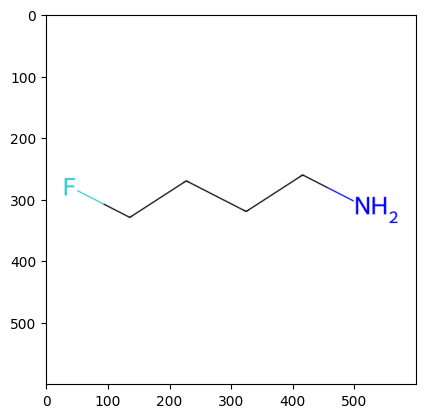

In [4]:
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw
import numpy as np

def plot():
    smiles = 'NCCCC(F)([H])[H]'  # SMILES string for a molecule
    mol = Chem.MolFromSmiles(smiles)  # Create a molecule
    mol_img = Chem.Draw.MolToImage(mol, size=(600,600))  # Convert the molecule to an image
    mol_img = np.asarray(mol_img)  # Convert the image to a numpy array

    fig, ax = plt.subplots()
    ax.imshow(mol_img)  # Display the image on a plot
    plt.show()

plot()


11
(tensor([ 0,  2,  2, 10,  2,  6,  6,  8,  8,  5,  5,  9,  9,  3,  3,  1,  1,  7,
         3,  4,  7,  8], dtype=torch.int32), tensor([ 2,  0, 10,  2,  6,  2,  8,  6,  5,  8,  9,  5,  3,  9,  1,  3,  7,  1,
         4,  3,  8,  7], dtype=torch.int32))


c:\work\DrugDiscovery\drug-discovery-venv\Lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


NetworkXError: draw_networkx_edge_labels does not support multiedges.

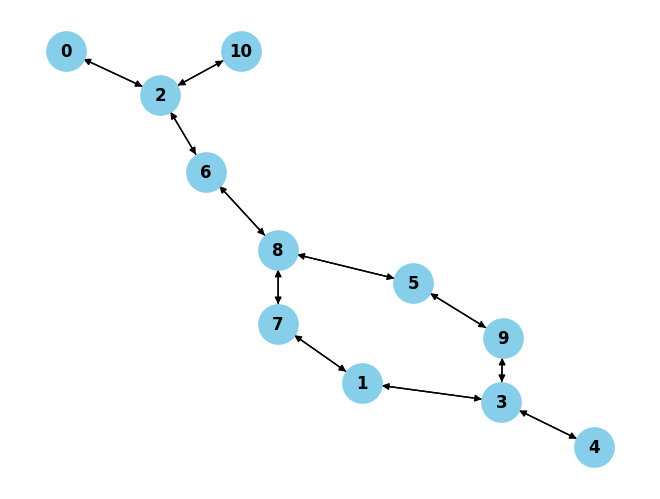

In [23]:

import json
import pickle
import pandas as pd
import numpy as np
import torch
import random
from process import run
import sys
import os

from torch import nn
from torch.utils.data import DataLoader
from torch.optim import Adam, SGD
from torch.optim.lr_scheduler import ReduceLROnPlateau, CyclicLR

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

from rdkit import Chem
from rdkit.Chem import rdmolops
import dgl
from dgllife.utils import smiles_to_bigraph
import networkx as nx


def setup(args, random_seed=0):
    """Decide the device to use for computing, set random seed and perform sanity check."""

    os.environ['PYTHONHASHSEED']=str(random_seed)
    np.random.seed(random_seed)
    random.seed(random_seed)
    torch.manual_seed(random_seed)
    dgl.seed(random_seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(random_seed)
        torch.cuda.manual_seed_all(random_seed)
        torch.backends.cudnn.enabled = False
        torch.backends.cudnn.benchmark = False
        torch.backends.cudnn.deterministic = True
    if args['n_tasks'] == 1:
        assert args['mode'] == 'parallel', \
            'Bypass architecture is not applicable for single-task experiments.'

    return args


def convert_smiles_to_dglgraph(smiles: str, args):
    dglgraph = smiles_to_bigraph(smiles=smiles,
                                 node_featurizer=args['node_featurizer'],
                                 edge_featurizer=args['edge_featurizer'])

    return dglgraph
    

SMILES = "CC(=O)NC1=CC=C(C=C1)O​"
   
if __name__ == '__main__':
    with open(r'C:\work\DrugDiscovery\RT_LogP_with_pKa_model\RTlogD\final_model/RTlogD/args.pickle', 'rb') as file:
        args =pickle.load(file)
        args['task'] = ['pKa']
    with open(r'C:\work\DrugDiscovery\RT_LogP_with_pKa_model\RTlogD\final_model/RTlogD/configure.json', 'r') as f:
        exp_config = json.load(f)
    args = setup(args)

    bg = convert_smiles_to_dglgraph(SMILES, args)

    nx_g = bg.to_networkx(node_attrs=['h'], edge_attrs=['e'])

    print(len(bg.ndata['h']))
    print(bg.edges())

    # Draw the graph
    pos = nx.spring_layout(nx_g)  # You can choose a different layout if needed
    nx.draw(nx_g, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, cmap=plt.cm.Blues)
    edge_labels = nx.get_edge_attributes(nx_g, 'e')
    nx.draw_networkx_edge_labels(nx_g, pos, edge_labels=edge_labels)
    plt.show()

    

NetworkXError: draw_networkx_edge_labels does not support multiedges.

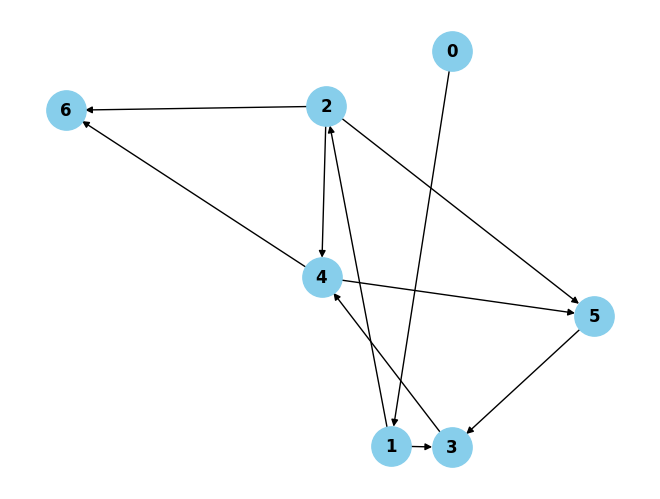

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import dgl
import torch

# Create a DGLGraph
g = dgl.graph(([0, 1, 1, 2, 2, 2, 3, 4, 4, 5], [1, 2, 3, 4, 5, 6, 4, 5, 6, 3]))

# Add node and edge features to the graph
g.ndata['h'] = torch.randn((g.num_nodes(), 74), dtype=torch.float32)
g.edata['e'] = torch.randn((g.num_edges(), 12), dtype=torch.float32)

# Convert DGLGraph to networkx graph
nx_g = g.to_networkx(node_attrs=['h'], edge_attrs=['e'])

# Draw the graph
pos = nx.spring_layout(nx_g)  # You can choose a different layout if needed
nx.draw(nx_g, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, cmap=plt.cm.Blues)

# Display edge attributes directly on the edges
edge_labels = nx.get_edge_attributes(nx_g, 'e')
nx.draw_networkx_edge_labels(nx_g, pos, edge_labels=edge_labels)

plt.show()
